In [2]:
# Simulação de porta dos desesperados para ME323 na Unicamp
#
# Rafael Sartori M. Santos - 186154
# Letícia M. Tateishi - 201454
#
# O chute da "inteligência artificial" é sempre na porta 1,
# pois se o random de Python for aleatório, não importa
# qual escolhemos para fazer isso.

import random
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros para o programa
MAX_ITERACOES = 10**4

In [3]:
# Configuração de random
random.seed()

# Variáveis para confirmar se random é aleatório
numeros_escolhidos = {
    '1': 0,
    '2': 0,
    '3': 0
}

# Variáveis de simulação
iteracoes = 0
num_vitorias_mudar = 0
num_vitorias_ficar = 0

# Estatística na simulação para gráfico
lista_x = []
lista_y1 = [] # 1: estratégia de trocar sempre
lista_y2 = [] # 2: estratégia de ficar sempre

In [4]:
# Laço de simulação
while iteracoes < MAX_ITERACOES:
    # Chutamos uma porta para ser a premiada
    porta_premiada = random.randint(1, 3)
    
    # Adicionamos a escolha à estatística
    numeros_escolhidos[str(porta_premiada)] += 1
    
    # Verificamos se a porta premiada é a primeira
    #
    # Se for a primeira, significa que quem sempre
    # fica ganha. Se não for a primeira, significa
    # que das 2 portas livres, uma será mostrada e
    # a outra possuirá o prêmio, ou seja, quem
    # sempre muda irá ganhar.
    #
    # Já dá para notar que a chance de ganhar
    # mudando de porta é 2/3, pois se cair na porta
    # 2 ou 3, quem muda ganha.
    if porta_premiada == 1:
        num_vitorias_ficar += 1
    else:
        num_vitorias_mudar += 1

    # Adicionamos iteração ao eixo x
    lista_x.append(iteracoes)
    lista_y1.append(num_vitorias_mudar / (num_vitorias_ficar + num_vitorias_mudar)) # Proporção acumulada
    lista_y2.append(num_vitorias_ficar / (num_vitorias_ficar + num_vitorias_mudar)) # Proporção acumulada
    
    # Vamos à próxima iteração
    iteracoes += 1

Estatística de random
	1	3360
	2	3272
	3	3368

Quem muda de porta ganha 6640 vezes (66.4%)
Quem fica com a porta ganha 3360 vezes (33.6%)


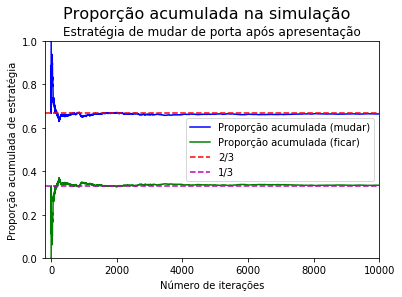

In [20]:
# Imprimimos resultados

# Estatísticas de quais portas foram sorteadas quantas vezes
print('Estatística de random')
for i in range(1, 4):
    print('\t{0}\t{1}'.format(i, numeros_escolhidos[str(i)]))

print()

# Estatísticas de vitória
print('Quem muda de porta ganha {0} vezes ({1}%)'.format(num_vitorias_mudar, num_vitorias_mudar * 100 / MAX_ITERACOES))
print('Quem fica com a porta ganha {0} vezes ({1}%)'.format(num_vitorias_ficar, num_vitorias_ficar * 100 / MAX_ITERACOES))

# Imprimir gráficos
min_x_display = -MAX_ITERACOES * 0.02   # Valor mínimo de X a ser mostrado

plt.plot(lista_x, lista_y1, 'b-', label='Proporção acumulada (mudar)')    # gráfico para estratégia de mudar
plt.plot(lista_x, lista_y2, 'g-', label='Proporção acumulada (ficar)')    # gráfico para estratégia de ficar
plt.plot([min_x_display, MAX_ITERACOES], [2/3, 2/3], 'r--', label='2/3')  # gráfico para 2/3
plt.plot([min_x_display, MAX_ITERACOES], [1/3, 1/3], 'm--', label='1/3')  # gráfico para 1/3

# Definimos posição da legenda
plt.legend(loc='center right')

# Configuramos os eixos
plt.axis([min_x_display, MAX_ITERACOES, 0, 1])

# Damos nome ao gráfico e eixos
plt.suptitle('Proporção acumulada na simulação', fontsize=16, y=1)
plt.title('Estratégia de mudar de porta após apresentação', fontsize=12)
plt.xlabel('Número de iterações')
plt.ylabel('Proporção acumulada de estratégia')

# Salvamos o gráfico em PDF
plt.savefig('grafico_prob_acum.pdf', dpi=300, format='pdf')
